In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshat103/e-waste-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 11.8M/11.8M [00:00<00:00, 161MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/akshat103/e-waste-image-dataset/versions/1


In [ ]:
import tensorflow as tf  # Core TensorFlow library

from tensorflow.keras import layers, models, optimizers, callbacks  # Layers, model creation, optimizers, and training callbacks

from tensorflow.keras.models import Sequential, load_model  # For sequential model architecture and loading saved models

from tensorflow.keras.applications import EfficientNetV2B0  # Pretrained EfficientNetV2B0 model for transfer learning

from tensorflow.keras.applications.efficientnet import preprocess_input  # Preprocessing function specific to EfficientNet

import numpy as np  # Numerical operations and array handling

import matplotlib.pyplot as plt  # Plotting graphs and images

import seaborn as sns  # Plotting graphs and images

from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics for classification models

import gradio as gr  # Web interface library to deploy and test ML models

from PIL import Image  # For image file loading and basic image operations

import os

import pandas as pd

In [ ]:
for dirname, _,filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname,filename))
    print(filename)

In [ ]:
train_folder = "/root/.cache/kagglehub/datasets/akshat103/e-waste-image-dataset/versions/1/modified-dataset/train"
test_folder = "/root/.cache/kagglehub/datasets/akshat103/e-waste-image-dataset/versions/1/modified-dataset/test"
val_folder = "/root/.cache/kagglehub/datasets/akshat103/e-waste-image-dataset/versions/1/modified-dataset/val"

In [ ]:
def get_counts(folder):
  counts={}
  for class_folder in os.listdir(folder) :
    class_path = os.path.join(folder,class_folder)
    if os.path.isdir(class_path):
      counts[class_folder] = len(os.listdir(class_path))
  return counts

In [ ]:
train_counts = get_counts(train_folder)
test_counts = get_counts(test_folder)
val_counts = get_counts(val_folder)
print(train_counts)
print(test_counts)
print(val_counts)
#This block contains the counts of the individual datasets(files) that is trained,test and split

{'Television': 240, 'Printer': 240, 'Washing Machine': 240, 'Keyboard': 240, 'Player': 240, 'Microwave': 240, 'Mouse': 240, 'Mobile': 240, 'Battery': 240, 'PCB': 240}
{'Television': 30, 'Printer': 30, 'Washing Machine': 30, 'Keyboard': 30, 'Player': 30, 'Microwave': 30, 'Mouse': 30, 'Mobile': 30, 'Battery': 30, 'PCB': 30}
{'Television': 30, 'Printer': 30, 'Washing Machine': 30, 'Keyboard': 30, 'Player': 30, 'Microwave': 30, 'Mouse': 30, 'Mobile': 30, 'Battery': 30, 'PCB': 30}


In [ ]:
df_train = pd.DataFrame(list(train_counts.items()), columns=['Class', 'Count'])
df_test = pd.DataFrame(list(test_counts.items()), columns=['Class', 'Count'])
df_val = pd.DataFrame(list(val_counts.items()), columns=['Class', 'Count'])
# The count of the datasets are converted to dataframes

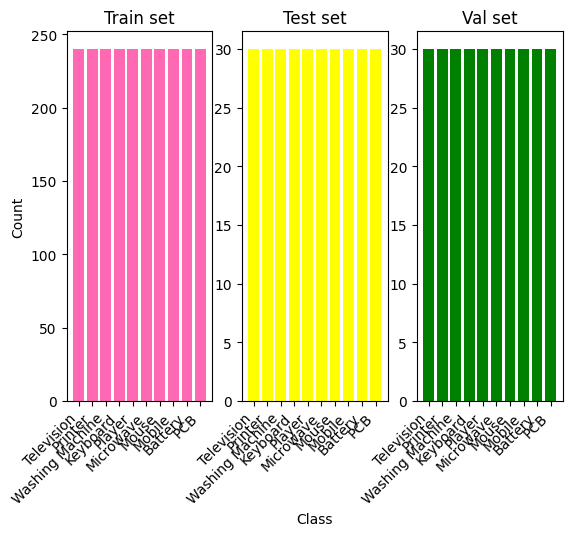

<Figure size 2500x1900 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

#plot count for tain data
plt.subplot(1,3,1)
plt.bar(df_train['Class'], df_train['Count'], color = 'hotpink')
plt.title('Train set')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

#plot count for test data
plt.subplot(1,3,2)
plt.bar(df_test['Class'], df_test['Count'], color = 'yellow')
plt.title('Test set')
plt.xlabel('Class')
plt.xticks(rotation=45, ha='right')

#plot count for val data
plt.subplot(1,3,3)
plt.bar(df_val['Class'], df_val['Count'], color = 'green')
plt.title('Val set')
plt.xticks(rotation=45, ha='right')

plt.figure(figsize=(25,19))
plt.show()